In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#import the countries data from the csv file with an index column of countries
df_morn = pd.read_csv("./week_testing/abbaas_home.csv")
df_morn.info()

#create columns for counts
counts_1_3 = df_morn['Chan_0_1']
counts_2_3 = df_morn['Chan_0_2']
counts_1_2 = df_morn['Chan_1_2']

timestamps = df_morn['timestamp'].values
print(type(timestamps))
print(df_morn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Chan_0_1   1480 non-null   int64 
 1   Chan_0_2   1480 non-null   int64 
 2   Chan_1_2   1480 non-null   int64 
 3   timestamp  1480 non-null   object
dtypes: int64(3), object(1)
memory usage: 46.4+ KB
<class 'numpy.ndarray'>
      Chan_0_1  Chan_0_2  Chan_1_2                  timestamp
0            7         7        15   Sat Mar 25 13:32:08 2023
1            9         5        13   Sat Mar 25 13:33:08 2023
2            8         4        14   Sat Mar 25 13:34:08 2023
3            5         5        15   Sat Mar 25 13:35:08 2023
4            8         4        15   Sat Mar 25 13:36:08 2023
...        ...       ...       ...                        ...
1475         3         8        12   Sun Mar 26 14:07:09 2023
1476         5         2         5   Sun Mar 26 14:08:09 2023
1477         2         5   

In [4]:
df_morn.dropna(inplace=True)

In [5]:
df_morn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Chan_0_1   1480 non-null   int64 
 1   Chan_0_2   1480 non-null   int64 
 2   Chan_1_2   1480 non-null   int64 
 3   timestamp  1480 non-null   object
dtypes: int64(3), object(1)
memory usage: 46.4+ KB


In [6]:
df_morn['timestamp'] = pd.to_datetime(df_morn['timestamp'])
df_morn.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
0,7,7,15,2023-03-25 13:32:08
1,9,5,13,2023-03-25 13:33:08
2,8,4,14,2023-03-25 13:34:08
3,5,5,15,2023-03-25 13:35:08
4,8,4,15,2023-03-25 13:36:08


In [7]:
df_morn.sort_values(by='timestamp', ascending=True, inplace=True)
df_morn.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
0,7,7,15,2023-03-25 13:32:08
1,9,5,13,2023-03-25 13:33:08
2,8,4,14,2023-03-25 13:34:08
3,5,5,15,2023-03-25 13:35:08
4,8,4,15,2023-03-25 13:36:08


In [8]:
df_morn_counts = df_morn[['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2']]
df_morn_counts.columns

Index(['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2'], dtype='object')

In [9]:
df_morn_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 0 to 1479
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1480 non-null   datetime64[ns]
 1   Chan_0_1   1480 non-null   int64         
 2   Chan_0_2   1480 non-null   int64         
 3   Chan_1_2   1480 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 57.8 KB


In [10]:
df_morn_counts = df_morn_counts.resample('H', on = 'timestamp', axis=0).mean()
df_morn_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2023-03-25 13:00:00,8.285714,7.071429,15.678571
2023-03-25 14:00:00,6.750000,5.516667,13.483333
2023-03-25 15:00:00,6.433333,5.016667,12.100000
2023-03-25 16:00:00,6.033333,4.733333,12.133333
2023-03-25 17:00:00,6.033333,4.850000,10.950000


In [11]:
#df_morn_counts= df_morn.interpolate(method='linear', limit_direction='both')  
#df_morn_counts.drop_duplicates(inplace=True)

#df_morn_counts.head(20)

Text(0.5, 1.0, 'March 18 Morning Individualized Counts')

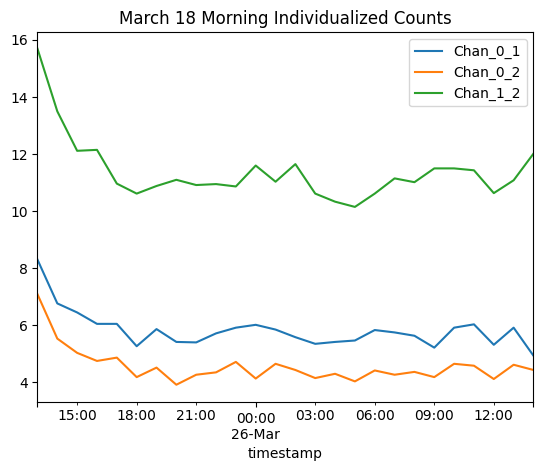

In [12]:
df_morn_counts.plot()
plt.title('March 18 Morning Individualized Counts')

In [13]:
df_morn_counts['average'] = df_morn_counts[['Chan_0_1', 'Chan_0_2', 'Chan_1_2']].mean(axis=1)
df_morn_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2,average
timestamp,,,,
2023-03-25 13:00:00,8.285714,7.071429,15.678571,10.345238
2023-03-25 14:00:00,6.750000,5.516667,13.483333,8.583333
2023-03-25 15:00:00,6.433333,5.016667,12.100000,7.850000
2023-03-25 16:00:00,6.033333,4.733333,12.133333,7.633333
2023-03-25 17:00:00,6.033333,4.850000,10.950000,7.277778


Text(0.5, 1.0, 'Abbaas Home March 25 1pm to March 26 1pm')

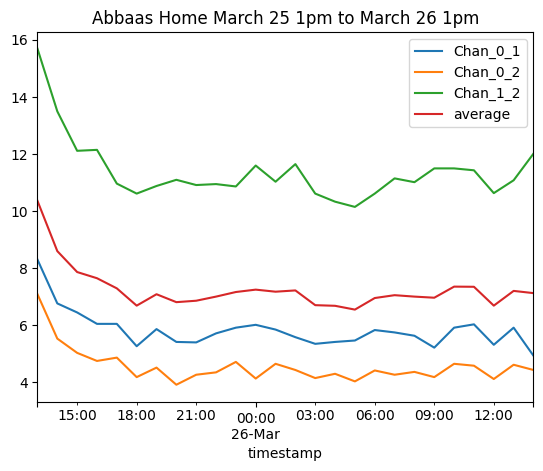

In [14]:
df_morn_counts.plot()
plt.title('Abbaas Home March 25 1pm to March 26 1pm')
#plt.ylim(0, 150)

Text(0.5, 1.0, 'March 18 Morning Average Counts')

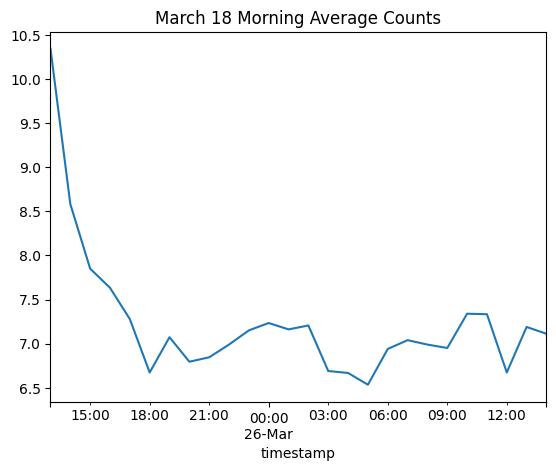

In [15]:
df_morn_counts['average'].plot()
plt.title('March 18 Morning Average Counts')